# Introduction to APIs


### APIs

An Application Programming Interface, or API, is a structured way to retrieve data from a website. An advantage of using APIs over, for example, downloading csv files, is that an API response will come in a structured, predictable format. There are many APIs available, including
- Government organizations ([US Government](https://www.data.gov/developers/apis))
- Large companies ([X API](https://developer.x.com/en/docs))
- News organizations ([NYT API](https://developer.nytimes.com/))
- And [many more](https://github.com/public-apis/public-apis)

If you type `how to use an api in python` in google, you get back many articles walking through how to use an API. It is a well documented and useful tool to be familiar with.

We'll be interacting with APIs using HTTP requests. HTTP, or **Hypertext Transfer Protocol** is the foundation for data communication on the world wide web.

It functions as a request/response protocol. The client submits a request to the server and the server returns a response message, which includes a status code indicating success or failure of the request. When navigating the web, your web browser is using HTTP requests to fetch the contents of the websites you are browsing.

To send HTTP requests, we will be using the [_requests_](https://requests.readthedocs.io/en/master/) library.

In [1]:
import requests
import matplotlib.pyplot as plt

## Basic API Usage

Let's start by using the [Cat Fact API](https://catfact.ninja/), an API which provides cat facts and information about cat breeds.

With any API, you should start by inspecting the documentation.

We will be using the `requests` package to make a `GET` request to an API. GET is used to request data from a specified resource.

When using an API, the first thing we need to know is the expected URL structure.

In [2]:
endpoint = 'https://catfact.ninja/fact'

response = requests.get(endpoint)

Let's check the response. If all is well, we should have a 200 response.

In [3]:
response

<Response [200]>

To access the content of the response, we can look at the `text` attribute.

In [4]:
response.text

'{"fact":"In contrast to dogs, cats have not undergone major changes during their domestication process.","length":94}'

For demonstration purposes, let's see what happens when we send an invalid request.

In [5]:
endpoint = 'https://catfact.ninja/fac'
response = requests.get(endpoint)
response

<Response [404]>

What if we want to be able to easily change the number that we want to retrieve. For this, we can make use of an f-string. 

In [6]:
max_length = 20

endpoint = f'https://catfact.ninja/fact?max_length={max_length}'

response = requests.get(endpoint)

response.text

'{"fact":"Cats have 3 eyelids.","length":20}'

However, it will be easier to work with as a json. We can use the `json` method to convert the results to a dictionary.

In [7]:
res = response.json()
res

{'fact': 'Cats have 3 eyelids.', 'length': 20}

Then, we can access the individual elements by passing in the correct key.

In [8]:
res['fact']

'Cats have 3 eyelids.'

We can also use a parameters dictionary to specify the max_length.

#### Parameters

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

1. Make an empty dictionary for the `params` variable
2. Look at the documentation to know what parameters you should include, add these as **keys** to the dictionary
3. Add the appropriate values for each parameter as the **values** for the dictionary

In [9]:
endpoint = 'https://catfact.ninja/fact'

params = {
    'max_length': '100'
}

response = requests.get(endpoint, params=params)

response.json()

{'fact': 'A cat can travel at a top speed of approximately 31 mph (49 km) over a short distance.',
 'length': 86}

### NASA API and API Keys

Now, let's work with the NASA API: https://api.nasa.gov/

One of the main ways APIs maintain security is by the use of some form of authentication, such as an API key. An API key can be obtained in a number of ways, depending on the API, and is a way for the application to know who you are and provides you secure access to the data.

To work with the NASA API, you'll need to create an API key.

1. Scroll down and enter your First Name, Last Name, and email to generate an API key
2. Copy the API key into the keys.json file.

**DO NOT SHARE YOUR API KEYS OR PUT THEM IN A PUBLIC PLACE LIKE GITHUB**

API keys should be stored securely on your computer and removed from any code or documents you share.

Now, we can safely load your key into a variable using the json library.

In [10]:
import json

In [11]:
with open('keys.json') as fi:
    credentials = json.load(fi)

In [12]:
api_key = credentials['api_key']

1. Look at the different available APIs in the `Browse APIs` tab
2. Click on the **Asteroids - NeoWs**
3. Under **Neo - Feed**, copy the URL up to the `?`

In [20]:
endpoint = 'https://api.nasa.gov/neo/rest/v1/feed'

Fill in the parameters dictionary below to retrieve information on all NeoWs between January 1, 2022 and January 7, 2022. (Be sure the include your api key as a parameter).

In [30]:
params = {
    'start_date' : "2022-01-01" ,
    'end_date' : "2022-01-07",
    'api_key' : api_key
    
}

You now have all the pieces to make an API request

In [31]:
response = requests.get(endpoint, params = params)

See what was saved to `response`

In [33]:
response

<Response [200]>

This API returns the results as a json, so we'll access them using the `json` method.

In [34]:
res = response.json()
res

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-07&end_date=2022-01-13&detailed=false&api_key=aVeP27tRSdfve2XlQTjVa8nu5n7bgntp53p3tkoN',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-26&end_date=2022-01-01&detailed=false&api_key=aVeP27tRSdfve2XlQTjVa8nu5n7bgntp53p3tkoN',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-07&detailed=false&api_key=aVeP27tRSdfve2XlQTjVa8nu5n7bgntp53p3tkoN'},
 'element_count': 39,
 'near_earth_objects': {'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2494697?api_key=aVeP27tRSdfve2XlQTjVa8nu5n7bgntp53p3tkoN'},
    'id': '2494697',
    'neo_reference_id': '2494697',
    'name': '494697 (2004 SW55)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2494697',
    'absolute_magnitude_h': 20.77,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1864468183,
      'estimated_diameter_max': 0.41690776},
   

In [25]:
res.keys()

dict_keys(['links', 'element_count', 'near_earth_objects'])

The information that we're interested in is located under `near_earth_objects`.

In [27]:
res['near_earth_objects']

{'2022-01-01': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2363505?api_key=aVeP27tRSdfve2XlQTjVa8nu5n7bgntp53p3tkoN'},
   'id': '2363505',
   'neo_reference_id': '2363505',
   'name': '363505 (2003 UC20)',
   'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2363505',
   'absolute_magnitude_h': 18.47,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.5377184977,
     'estimated_diameter_max': 1.2023751136},
    'meters': {'estimated_diameter_min': 537.7184976927,
     'estimated_diameter_max': 1202.3751135999},
    'miles': {'estimated_diameter_min': 0.3341226806,
     'estimated_diameter_max': 0.7471210267},
    'feet': {'estimated_diameter_min': 1764.1683559701,
     'estimated_diameter_max': 3944.8003677031}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2022-01-01',
     'close_approach_date_full': '2022-Jan-01 01:25',
     'epoch_date_close_approach': 1641000300000,
     'rel

In [35]:
res['near_earth_objects'].keys()

dict_keys(['2022-01-07', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-01', '2022-01-02'])

**Question:** How many near earth objects were there on January 3?

In [36]:
# Your Code Here
len(res['near_earth_objects']['2022-01-03'])

2

**Question:** Is the first returned result for January 3 potentially hazardous (as indicated by the `is_potentially_hazardous_asteroid` field)?

In [37]:
# Your Code Here
res['near_earth_objects']['2022-01-03'][0]['is_potentially_hazardous_asteroid']

False

**Question:** What was the relative velocity, in miles per hour of the first object returned for January 3?

In [38]:
# Your Code Here
res['near_earth_objects']['2022-01-03'][0]['close_approach_data'][0]['relative_velocity']['miles_per_hour']

'50865.239055435'

The for loop below iterates over the data returned and pulls out information for each asteroid. It then saves the information to lists, that are used for making a scatter plot of the asteroids.

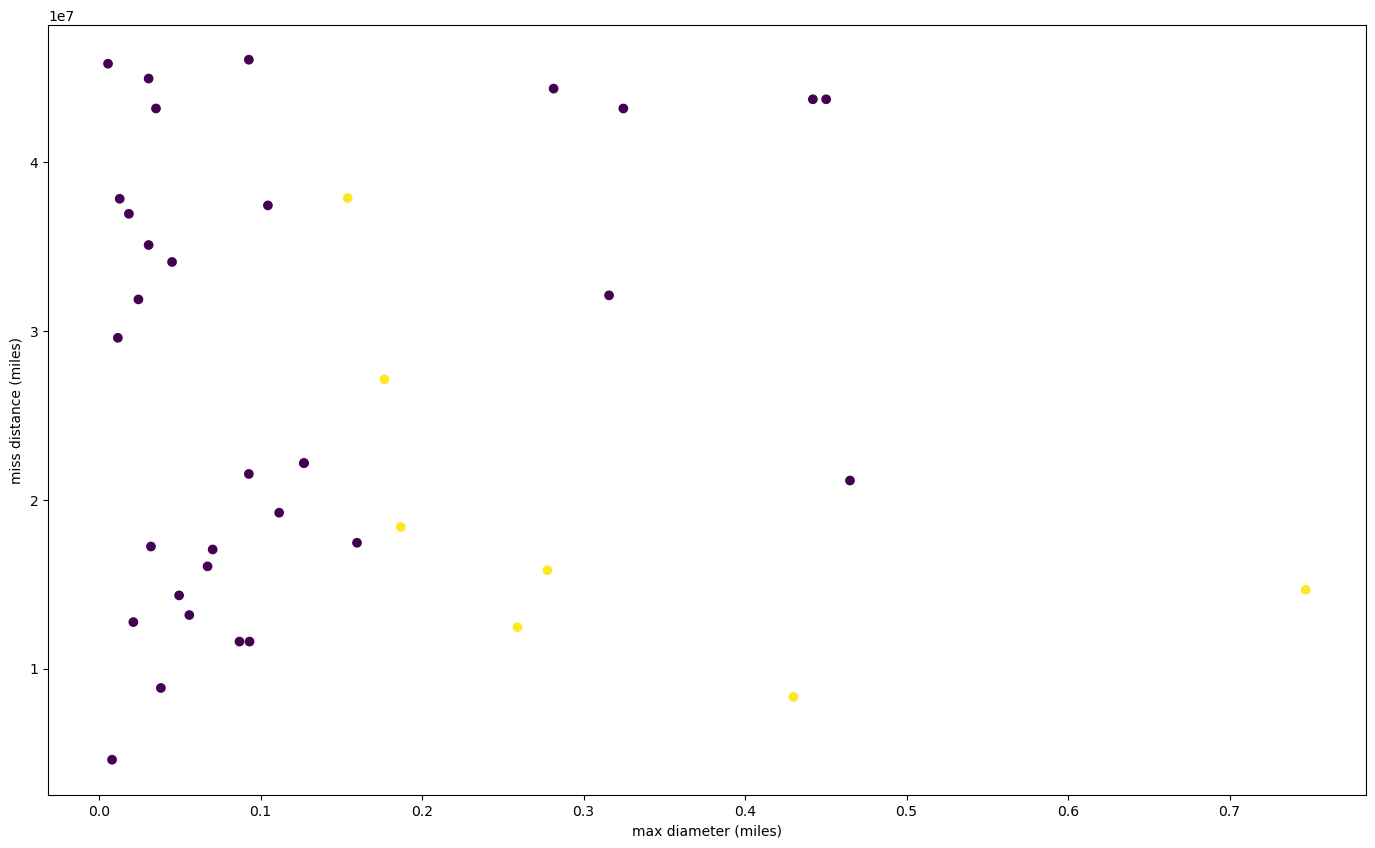

In [39]:
max_diam = []
hazardous = []
miss_dist = []
for day, objs in res['near_earth_objects'].items():
    for obj in objs:
        max_diam.append(float(obj['estimated_diameter']['miles']['estimated_diameter_max']))
        hazardous.append(obj['is_potentially_hazardous_asteroid'])
        miss_dist.append(float(obj['close_approach_data'][0]['miss_distance']['miles']))

plt.figure(figsize = (17, 10))
plt.scatter(max_diam, miss_dist, c = hazardous)
plt.xlabel('max diameter (miles)')
plt.ylabel('miss distance (miles)');

If you want to work with the response from an API using _pandas_, you'll want to convert it to a DataFrame. In some circumstances, you can easily convert a json to a DataFrame, but in other cases, you have to do a little bit of work.

In [40]:
import pandas as pd

The easiest case is when you have a list of dictionaries. Here, you can simply use the `DataFrame` constructor. Let's see how this works using one of the days. If you wanted to get all of the results into a single DataFrame, you could iterate through and concatenate. 

In [41]:
pd.DataFrame(response.json()['near_earth_objects']['2022-01-07']).head(2)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,{'kilometers': {'estimated_diameter_min': 0.18...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,{'kilometers': {'estimated_diameter_min': 0.30...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False


You'll notice that we still have dictionaries in some of the columns. This can be remedied using the `json_normalize` function.

In [42]:
pd.json_normalize(response.json()['near_earth_objects']['2022-01-07']).head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.90776,0.115853,0.259054,611.702179,1367.807655
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,309.424699,691.89466,0.192268,0.429923,1015.172928,2269.995676


This almost does it, but the `close_approach_data` column contains a list, which `json_normalize` can't handle. To fix this, we can use the `explode` method which will unpack the list across multiple columns, if needed.

In [43]:
response_df = pd.json_normalize(response.json()['near_earth_objects']['2022-01-07'])
response_df.explode('close_approach_data').head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,"{'close_approach_date': '2022-01-07', 'close_a...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.90776,0.115853,0.259054,611.702179,1367.807655
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,"{'close_approach_date': '2022-01-07', 'close_a...",False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,309.424699,691.89466,0.192268,0.429923,1015.172928,2269.995676


Once exploded, you can use the `json_normalize` function again.

In [44]:
pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data']).head(2)

,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2022-01-07,2022-Jan-07 12:09,1641557340000,Earth,10.0478001196,36172.0804304837,22475.9240874858,0.1338706738,52.0756921082,20026767.655944806,12444056.3828420828
1,2022-01-07,2022-Jan-07 02:07,1641521220000,Earth,16.7624360583,60344.7698097014,37495.8932187003,0.0895472705,34.8338882245,13396080.931113835,8323938.704427523


And finally, you can concatenate the two pieces together.

In [45]:
pd.concat([
    response_df.explode('close_approach_data').drop(columns = ['close_approach_data']),
    pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data'])
], axis = 1).head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,...,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,2494697,2494697,494697 (2004 SW55),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.77,True,False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,...,2022-Jan-07 12:09,1641557340000,Earth,10.0478001196,36172.0804304837,22475.9240874858,0.1338706738,52.0756921082,20026767.655944806,12444056.3828420828
1,2496860,2496860,496860 (1999 XL136),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.67,True,False,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.309425,0.691895,...,2022-Jan-07 02:07,1641521220000,Earth,16.7624360583,60344.7698097014,37495.8932187003,0.0895472705,34.8338882245,13396080.931113835,8323938.704427523


Let's try another `endpoint` from NASA. This time copy the endpoint from the **APOD** (Astronomy Picture of the Day) section.

Fill in the endpoint and parameters in order to retrieve the image for January 1, 2019.

In [ ]:
endpoint = ''

params = {

}

In [ ]:
response = requests.get(endpoint, params = params)

In [ ]:
response

In [ ]:
response.json()

Finally, let's grab the image url so that we can retrieve the actual image.

In [ ]:
image_response = requests.get(response.json()['url'])

For image responses, we don't want to look at the text or json, but instead take the content. We'll now use the `.content` attribute from the response to render an image.

In [ ]:
from IPython.display import Image

In [ ]:
Image(image_response.content)